# Studying the Effects of Ambient Temperature on Cognitive Function
MANU 465  
Ramiro Bolanos, Santiago Mendoza Reyes, Arjav Prasad, Sanskar Soni, Yuhan Zeng


## Introduction

The motivation behind this project is to reveal the effects that different ambient temperatures have on cognitive performance.
Cognitve tests were given to 29 participants in both room temperature conditions (around 22 degrees Celsius) and in cold temperature conditions (around 9 degrees Celsius). Particpants were wearing the Muse headband which measures Electroencephalography (EEG) signals. Using these signals we hope to model this binary classfication problem.

We first created the datasets for test and train by applying Fast Fourier Transform (FFT) on 4 Raw data featues gotten from 4 sensors. We encoded the data, split it, scaled it before applying a variety of models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Procedure

### 0. Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

### 1. Data Pre-Proccessing

We apply Fast Fourier Transform (FFT) analyis to convert our time-domain signals to the frequency-domain. We create two datasets. One for Train and one for Test. The following scripts will run FFT analyis on every entry for every 8 seconds.  

#### Getting Train Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Define the base directory containing the 'Room' and 'Cold' folders
base_directory = '/content/drive/MyDrive/MANU465Project/SubmissionDatasets/CleanedData/Train'
modes = ['Room', 'Cold']

# Determine the sampling rate (samples per second)
sampling_rate = 255

# Calculate the number of samples for an 8-second interval
samples_for_8_seconds = 8 * sampling_rate

# Columns to perform FFT on
fft_columns = ['RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10']

# Initialize the main DataFrame to store all results
train_dataset = pd.DataFrame()

# Iterate over each mode
for mode in modes:
    mode_directory = os.path.join(base_directory, mode)

    # Iterate over each file in the mode directory
    for file in os.listdir(mode_directory):

        # Load the data from the file
        file_path = os.path.join(mode_directory, file)
        data = pd.read_csv(file_path)

        # Initialize a DataFrame to store FFT results for this file
        feature_rows = pd.DataFrame()

        # Iterate over the data in 8-second intervals
        for start in range(0, len(data), samples_for_8_seconds):
            end = start + samples_for_8_seconds
            if end > len(data):
                break  # Skip the last segment if it's shorter than 8 seconds

            # Extract the segment
            segment = data.iloc[start:end]

            # Initialize a temporary DataFrame for the FFT results of this segment
            segment_fft_results = []

            # Perform FFT on each specified column
            for col in fft_columns:
                # Check if the column exists in the segment
                if col in segment.columns:
                    # Applying FFT and handling NaN values
                    transformed_data = fft(np.nan_to_num(segment[col]))
                    # Store the squared magnitude of the FFT result
                    segment_fft_results.extend(np.abs(transformed_data)**2)

            # Append the FFT results of this segment to the feature_rows DataFrame
            feature_rows = feature_rows.append(pd.DataFrame([segment_fft_results]))

        # Adjusting the column names
        feature_rows.columns = [f'{col}_{i}' for col in fft_columns for i in range(samples_for_8_seconds)]

        # Append the mode to each row
        feature_rows['Mode'] = mode

        # Append the results to the main DataFrame
        train_dataset = pd.concat([train_dataset, feature_rows], ignore_index=True)

# Reset the index and optionally save the dataset
train_dataset.reset_index(drop=True, inplace=True)

#### Encoding Train Dataset

In [ ]:
# Replace 'Room' with 0 and 'Cold' with 1 in the 'Mode' column
train_dataset['Mode'] = train_dataset['Mode'].replace({'Room': 0, 'Cold': 1})

In [ ]:
train_dataset

,RAW_TP9_0,RAW_TP9_1,RAW_TP9_2,RAW_TP9_3,RAW_TP9_4,RAW_TP9_5,RAW_TP9_6,RAW_TP9_7,RAW_TP9_8,RAW_TP9_9,...,RAW_TP10_2031,RAW_TP10_2032,RAW_TP10_2033,RAW_TP10_2034,RAW_TP10_2035,RAW_TP10_2036,RAW_TP10_2037,RAW_TP10_2038,RAW_TP10_2039,Mode
0,2.684439e+12,1.204252e+07,1.816456e+05,5.292180e+06,1.813190e+06,4.700123e+07,1.823010e+07,1.418778e+08,2.323768e+07,3.462337e+07,...,1.564924e+07,1.210901e+07,1.057362e+08,4.673809e+07,1.864400e+07,3.256209e+06,1.960138e+06,3.305650e+06,9.791019e+05,0
1,2.689431e+12,1.367163e+06,2.683858e+06,1.299043e+07,4.136239e+06,3.546481e+07,2.944831e+05,5.134085e+07,1.035159e+07,1.748455e+07,...,1.309948e+07,6.645173e+06,1.029885e+08,7.327160e+06,4.854810e+07,1.003956e+07,4.486791e+07,8.811148e+06,7.812621e+05,0
2,2.495207e+12,1.232094e+07,2.608846e+07,7.094889e+06,3.011121e+07,1.141792e+08,9.988897e+07,8.509099e+06,7.659951e+06,2.203632e+07,...,2.399888e+07,1.097554e+06,1.666506e+06,5.863434e+06,1.222693e+07,3.685023e+06,8.126653e+06,1.442532e+06,2.940128e+06,0
3,2.608230e+12,1.376740e+08,3.091234e+07,1.369881e+07,2.440765e+06,2.946906e+06,6.520893e+06,1.805250e+05,9.552387e+06,3.260502e+07,...,4.408951e+06,5.135949e+06,9.553814e+05,5.379222e+06,3.774773e+06,7.884184e+06,2.253834e+06,4.079112e+05,2.044691e+06,0
4,2.597221e+12,1.049503e+07,6.847503e+06,5.300514e+06,1.162559e+07,1.375341e+07,1.271880e+07,1.253422e+07,2.227696e+06,3.955753e+06,...,7.774209e+06,1.634527e+06,4.073989e+06,1.182046e+06,4.882577e+06,2.360345e+06,2.107642e+06,9.302289e+05,6.908124e+06,0
5,2.359688e+12,1.296095e+10,4.655779e+09,1.188813e+09,1.004854e+09,1.081730e+09,1.629063e+09,4.866214e+08,2.206303e+08,1.570209e+08,...,5.651990e+06,3.608142e+07,1.807813e+07,9.798425e+05,4.656115e+06,6.604360e+07,2.330019e+07,2.891891e+07,5.272731e+07,0
6,2.453633e+12,2.238839e+09,2.076065e+09,1.662041e+08,9.945654e+08,9.881327e+08,4.895441e+08,1.807438e+08,1.422826e+08,5.515260e+06,...,2.351958e+07,1.740639e+07,2.863660e+07,2.901958e+07,2.081769e+07,4.054955e+07,1.259817e+07,1.346680e+07,1.555128e+08,0
7,2.724732e+12,9.770013e+08,2.210051e+09,6.153899e+09,4.778648e+09,5.425049e+08,3.016736e+09,4.727727e+09,1.287354e+09,5.532391e+08,...,6.964644e+08,1.111563e+09,7.034312e+08,7.192708e+08,9.286871e+08,4.374054e+08,4.090150e+08,1.244643e+08,3.616659e+07,0
8,2.728040e+12,2.588831e+08,3.189536e+07,2.956011e+07,4.827239e+06,4.393835e+06,2.387214e+07,1.395675e+07,2.068996e+07,1.194431e+08,...,2.286338e+08,1.034978e+08,5.318982e+07,9.664357e+07,1.301105e+08,4.612852e+07,5.985124e+07,1.210794e+08,2.635494e+08,0
9,2.699413e+12,1.004635e+08,4.097904e+06,2.965178e+07,2.227566e+07,5.895956e+06,1.638294e+07,3.409166e+07,1.327983e+07,3.176603e+07,...,5.302688e+07,1.958750e+07,2.134109e+07,1.898096e+05,3.829171e+06,3.617713e+06,1.172859e+07,1.397073e+06,3.943563e+05,0


#### Getting Test Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Define the base directory containing the 'Room' and 'Cold' folders
base_directory = '/content/drive/MyDrive/MANU465Project/SubmissionDatasets/CleanedData/Test'
modes = ['Room', 'Cold']

# Determine the sampling rate (samples per second)
sampling_rate = 255

# Calculate the number of samples for an 8-second interval
samples_for_8_seconds = 8 * sampling_rate

# Columns to perform FFT on
fft_columns = ['RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10']

# Initialize the main DataFrame to store all results
test_dataset = pd.DataFrame()

# Iterate over each mode
for mode in modes:
    mode_directory = os.path.join(base_directory, mode)

    # Iterate over each file in the mode directory
    for file in os.listdir(mode_directory):

        # Load the data from the file
        file_path = os.path.join(mode_directory, file)
        data = pd.read_csv(file_path)

        # Initialize a DataFrame to store FFT results for this file
        feature_rows = pd.DataFrame()

        # Iterate over the data in 8-second intervals
        for start in range(0, len(data), samples_for_8_seconds):
            end = start + samples_for_8_seconds
            if end > len(data):
                break  # Skip the last segment if it's shorter than 8 seconds

            # Extract the segment
            segment = data.iloc[start:end]

            # Initialize a temporary DataFrame for the FFT results of this segment
            segment_fft_results = []

            # Perform FFT on each specified column
            for col in fft_columns:
                # Check if the column exists in the segment
                if col in segment.columns:
                    # Applying FFT and handling NaN values
                    transformed_data = fft(np.nan_to_num(segment[col]))
                    # Store the squared magnitude of the FFT result
                    segment_fft_results.extend(np.abs(transformed_data)**2)

            # Append the FFT results of this segment to the feature_rows DataFrame
            feature_rows = feature_rows.append(pd.DataFrame([segment_fft_results]))

        # Adjusting the column names
        feature_rows.columns = [f'{col}_{i}' for col in fft_columns for i in range(samples_for_8_seconds)]

        # Append the mode to each row
        feature_rows['Mode'] = mode

        # Append the results to the main DataFrame
        test_dataset = pd.concat([test_dataset, feature_rows], ignore_index=True)

# Reset the index and optionally save the dataset
test_dataset.reset_index(drop=True, inplace=True)

#### Encoding Test Dataset

In [ ]:
# Replace 'Room' with 0 and 'Cold' with 1 in the 'Mode' column
test_dataset['Mode'] = test_dataset['Mode'].replace({'Room': 0, 'Cold': 1})

In [ ]:
test_dataset

,RAW_TP9_0,RAW_TP9_1,RAW_TP9_2,RAW_TP9_3,RAW_TP9_4,RAW_TP9_5,RAW_TP9_6,RAW_TP9_7,RAW_TP9_8,RAW_TP9_9,...,RAW_TP10_2031,RAW_TP10_2032,RAW_TP10_2033,RAW_TP10_2034,RAW_TP10_2035,RAW_TP10_2036,RAW_TP10_2037,RAW_TP10_2038,RAW_TP10_2039,Mode
0,2.649265e+12,5.203283e+06,4.281567e+06,1.138019e+07,8.406580e+06,2.105196e+07,8.394301e+06,1.201862e+07,4.827966e+06,1.057350e+07,...,1.684205e+06,8.835889e+03,1.161208e+07,3.534821e+06,2.203708e+07,7.179868e+06,3.901530e+06,4.004216e+06,2.567037e+06,0
1,2.665544e+12,3.386126e+08,1.108098e+08,8.473244e+06,1.603144e+07,8.493803e+06,1.348803e+07,4.984527e+06,5.013959e+06,7.884187e+06,...,2.042416e+07,7.325275e+06,1.862229e+06,4.386940e+06,1.304660e+07,2.755504e+07,3.261857e+07,2.007542e+08,3.279582e+08,0
2,2.662986e+12,1.087222e+07,1.929439e+07,7.271376e+07,1.469243e+07,5.831339e+07,3.078866e+07,1.397735e+07,5.902607e+07,1.853937e+07,...,3.234078e+06,1.341768e+07,6.819777e+06,2.355096e+07,4.134914e+07,1.273942e+07,7.392377e+07,1.514484e+07,3.584791e+07,0
3,2.577300e+12,7.921624e+06,2.080133e+08,1.408206e+08,7.872890e+07,5.538521e+07,6.245222e+07,4.803105e+07,1.157962e+07,6.216503e+07,...,4.528597e+06,2.816351e+05,1.137463e+06,3.171941e+06,2.902435e+05,8.408391e+06,2.296769e+06,3.007794e+05,1.852403e+06,0
4,2.853060e+12,1.627605e+09,7.293873e+08,7.565532e+08,5.266050e+08,2.244922e+08,3.238684e+08,2.841532e+08,1.328081e+08,5.091491e+08,...,1.094967e+08,1.852352e+08,6.897649e+07,5.643811e+07,3.133643e+07,8.554432e+07,5.145950e+06,3.241714e+07,1.360483e+07,0
5,2.561246e+12,2.750059e+08,5.033228e+07,5.088716e+07,9.329289e+07,2.622345e+07,5.653824e+07,2.473437e+07,1.622552e+08,3.414246e+07,...,3.606298e+07,5.380266e+06,2.442689e+06,1.213976e+07,1.952411e+07,5.942659e+07,7.763983e+06,5.729757e+06,7.682591e+06,0
6,2.457383e+12,7.351675e+08,3.342565e+07,9.988859e+07,3.804466e+06,1.916978e+08,9.774083e+06,2.354888e+06,3.900304e+07,3.776885e+07,...,5.063454e+07,2.329743e+07,8.652487e+05,7.115427e+07,5.182769e+07,1.160482e+06,8.965652e+07,4.459340e+07,5.725927e+08,0
7,2.512694e+12,2.476057e+08,9.188537e+07,3.914585e+07,2.127150e+07,1.308441e+07,3.604271e+07,3.032033e+07,1.533193e+08,4.410566e+07,...,2.367818e+07,2.552303e+08,2.011805e+07,3.750927e+07,8.903486e+06,1.381813e+07,5.261860e+07,8.266051e+07,1.085500e+08,0
8,2.404158e+12,8.438397e+08,8.159530e+08,2.525503e+08,4.410527e+07,1.217876e+07,1.479597e+08,6.069723e+07,1.374597e+07,2.026275e+07,...,1.930487e+07,3.326299e+07,8.229492e+07,1.440949e+08,5.149765e+06,9.141668e+07,3.067001e+08,6.928996e+08,9.840401e+08,0
9,2.389313e+12,8.269446e+08,9.568384e+08,9.714255e+08,1.521989e+08,2.670240e+08,2.298904e+08,1.146505e+08,9.355382e+07,1.149896e+08,...,1.083102e+08,4.456891e+07,1.032056e+08,1.533484e+08,1.958889e+08,2.003841e+08,6.329955e+08,8.976718e+08,8.601755e+08,1


### 2. Splitting the Data

#### Getting X_train

In [ ]:
X_train = train_dataset.iloc[:, :-1]
X_train

,RAW_TP9_0,RAW_TP9_1,RAW_TP9_2,RAW_TP9_3,RAW_TP9_4,RAW_TP9_5,RAW_TP9_6,RAW_TP9_7,RAW_TP9_8,RAW_TP9_9,...,RAW_TP10_2030,RAW_TP10_2031,RAW_TP10_2032,RAW_TP10_2033,RAW_TP10_2034,RAW_TP10_2035,RAW_TP10_2036,RAW_TP10_2037,RAW_TP10_2038,RAW_TP10_2039
0,2.684439e+12,1.204252e+07,1.816456e+05,5.292180e+06,1.813190e+06,4.700123e+07,1.823010e+07,1.418778e+08,2.323768e+07,3.462337e+07,...,8.789983e+06,1.564924e+07,1.210901e+07,1.057362e+08,4.673809e+07,1.864400e+07,3.256209e+06,1.960138e+06,3.305650e+06,9.791019e+05
1,2.689431e+12,1.367163e+06,2.683858e+06,1.299043e+07,4.136239e+06,3.546481e+07,2.944831e+05,5.134085e+07,1.035159e+07,1.748455e+07,...,4.864444e+07,1.309948e+07,6.645173e+06,1.029885e+08,7.327160e+06,4.854810e+07,1.003956e+07,4.486791e+07,8.811148e+06,7.812621e+05
2,2.495207e+12,1.232094e+07,2.608846e+07,7.094889e+06,3.011121e+07,1.141792e+08,9.988897e+07,8.509099e+06,7.659951e+06,2.203632e+07,...,8.008121e+06,2.399888e+07,1.097554e+06,1.666506e+06,5.863434e+06,1.222693e+07,3.685023e+06,8.126653e+06,1.442532e+06,2.940128e+06
3,2.608230e+12,1.376740e+08,3.091234e+07,1.369881e+07,2.440765e+06,2.946906e+06,6.520893e+06,1.805250e+05,9.552387e+06,3.260502e+07,...,3.945852e+06,4.408951e+06,5.135949e+06,9.553814e+05,5.379222e+06,3.774773e+06,7.884184e+06,2.253834e+06,4.079112e+05,2.044691e+06
4,2.597221e+12,1.049503e+07,6.847503e+06,5.300514e+06,1.162559e+07,1.375341e+07,1.271880e+07,1.253422e+07,2.227696e+06,3.955753e+06,...,1.699729e+07,7.774209e+06,1.634527e+06,4.073989e+06,1.182046e+06,4.882577e+06,2.360345e+06,2.107642e+06,9.302289e+05,6.908124e+06
5,2.359688e+12,1.296095e+10,4.655779e+09,1.188813e+09,1.004854e+09,1.081730e+09,1.629063e+09,4.866214e+08,2.206303e+08,1.570209e+08,...,1.870070e+07,5.651990e+06,3.608142e+07,1.807813e+07,9.798425e+05,4.656115e+06,6.604360e+07,2.330019e+07,2.891891e+07,5.272731e+07
6,2.453633e+12,2.238839e+09,2.076065e+09,1.662041e+08,9.945654e+08,9.881327e+08,4.895441e+08,1.807438e+08,1.422826e+08,5.515260e+06,...,7.308478e+07,2.351958e+07,1.740639e+07,2.863660e+07,2.901958e+07,2.081769e+07,4.054955e+07,1.259817e+07,1.346680e+07,1.555128e+08
7,2.724732e+12,9.770013e+08,2.210051e+09,6.153899e+09,4.778648e+09,5.425049e+08,3.016736e+09,4.727727e+09,1.287354e+09,5.532391e+08,...,7.963513e+08,6.964644e+08,1.111563e+09,7.034312e+08,7.192708e+08,9.286871e+08,4.374054e+08,4.090150e+08,1.244643e+08,3.616659e+07
8,2.728040e+12,2.588831e+08,3.189536e+07,2.956011e+07,4.827239e+06,4.393835e+06,2.387214e+07,1.395675e+07,2.068996e+07,1.194431e+08,...,5.724979e+07,2.286338e+08,1.034978e+08,5.318982e+07,9.664357e+07,1.301105e+08,4.612852e+07,5.985124e+07,1.210794e+08,2.635494e+08
9,2.699413e+12,1.004635e+08,4.097904e+06,2.965178e+07,2.227566e+07,5.895956e+06,1.638294e+07,3.409166e+07,1.327983e+07,3.176603e+07,...,1.148194e+06,5.302688e+07,1.958750e+07,2.134109e+07,1.898096e+05,3.829171e+06,3.617713e+06,1.172859e+07,1.397073e+06,3.943563e+05


#### Getting y_train

In [ ]:
y_train = train_dataset['Mode']
y_train

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
Name: Mode, dtype: int64

#### Getting X_test

In [ ]:
X_test = test_dataset.iloc[:, :-1]
X_test

,RAW_TP9_0,RAW_TP9_1,RAW_TP9_2,RAW_TP9_3,RAW_TP9_4,RAW_TP9_5,RAW_TP9_6,RAW_TP9_7,RAW_TP9_8,RAW_TP9_9,...,RAW_TP10_2030,RAW_TP10_2031,RAW_TP10_2032,RAW_TP10_2033,RAW_TP10_2034,RAW_TP10_2035,RAW_TP10_2036,RAW_TP10_2037,RAW_TP10_2038,RAW_TP10_2039
0,2.649265e+12,5.203283e+06,4.281567e+06,1.138019e+07,8.406580e+06,2.105196e+07,8.394301e+06,1.201862e+07,4.827966e+06,1.057350e+07,...,3.268221e+06,1.684205e+06,8.835889e+03,1.161208e+07,3.534821e+06,2.203708e+07,7.179868e+06,3.901530e+06,4.004216e+06,2.567037e+06
1,2.665544e+12,3.386126e+08,1.108098e+08,8.473244e+06,1.603144e+07,8.493803e+06,1.348803e+07,4.984527e+06,5.013959e+06,7.884187e+06,...,3.258547e+06,2.042416e+07,7.325275e+06,1.862229e+06,4.386940e+06,1.304660e+07,2.755504e+07,3.261857e+07,2.007542e+08,3.279582e+08
2,2.662986e+12,1.087222e+07,1.929439e+07,7.271376e+07,1.469243e+07,5.831339e+07,3.078866e+07,1.397735e+07,5.902607e+07,1.853937e+07,...,6.736560e+06,3.234078e+06,1.341768e+07,6.819777e+06,2.355096e+07,4.134914e+07,1.273942e+07,7.392377e+07,1.514484e+07,3.584791e+07
3,2.577300e+12,7.921624e+06,2.080133e+08,1.408206e+08,7.872890e+07,5.538521e+07,6.245222e+07,4.803105e+07,1.157962e+07,6.216503e+07,...,1.751825e+06,4.528597e+06,2.816351e+05,1.137463e+06,3.171941e+06,2.902435e+05,8.408391e+06,2.296769e+06,3.007794e+05,1.852403e+06
4,2.853060e+12,1.627605e+09,7.293873e+08,7.565532e+08,5.266050e+08,2.244922e+08,3.238684e+08,2.841532e+08,1.328081e+08,5.091491e+08,...,4.718729e+07,1.094967e+08,1.852352e+08,6.897649e+07,5.643811e+07,3.133643e+07,8.554432e+07,5.145950e+06,3.241714e+07,1.360483e+07
5,2.561246e+12,2.750059e+08,5.033228e+07,5.088716e+07,9.329289e+07,2.622345e+07,5.653824e+07,2.473437e+07,1.622552e+08,3.414246e+07,...,7.068435e+06,3.606298e+07,5.380266e+06,2.442689e+06,1.213976e+07,1.952411e+07,5.942659e+07,7.763983e+06,5.729757e+06,7.682591e+06
6,2.457383e+12,7.351675e+08,3.342565e+07,9.988859e+07,3.804466e+06,1.916978e+08,9.774083e+06,2.354888e+06,3.900304e+07,3.776885e+07,...,2.856241e+07,5.063454e+07,2.329743e+07,8.652487e+05,7.115427e+07,5.182769e+07,1.160482e+06,8.965652e+07,4.459340e+07,5.725927e+08
7,2.512694e+12,2.476057e+08,9.188537e+07,3.914585e+07,2.127150e+07,1.308441e+07,3.604271e+07,3.032033e+07,1.533193e+08,4.410566e+07,...,1.218424e+08,2.367818e+07,2.552303e+08,2.011805e+07,3.750927e+07,8.903486e+06,1.381813e+07,5.261860e+07,8.266051e+07,1.085500e+08
8,2.404158e+12,8.438397e+08,8.159530e+08,2.525503e+08,4.410527e+07,1.217876e+07,1.479597e+08,6.069723e+07,1.374597e+07,2.026275e+07,...,1.166093e+08,1.930487e+07,3.326299e+07,8.229492e+07,1.440949e+08,5.149765e+06,9.141668e+07,3.067001e+08,6.928996e+08,9.840401e+08
9,2.389313e+12,8.269446e+08,9.568384e+08,9.714255e+08,1.521989e+08,2.670240e+08,2.298904e+08,1.146505e+08,9.355382e+07,1.149896e+08,...,6.239572e+07,1.083102e+08,4.456891e+07,1.032056e+08,1.533484e+08,1.958889e+08,2.003841e+08,6.329955e+08,8.976718e+08,8.601755e+08


#### Getting y_test

In [ ]:
y_test = test_dataset['Mode']
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
Name: Mode, dtype: int64

### 3. Scaling the data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Modeling

We tested multipled models and compared the accuracy scores to determine which model best fit our data.

In [ ]:
from sklearn.metrics import accuracy_score

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = 2)
dt_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluating the model
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")

Decision Tree Accuracy: 76.47%


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees and other parameters
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")

Random Forest Accuracy: 88.24%


### XGBoost

In [ ]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, max_depth = 2, n_estimators = 100, learning_rate = 0.3)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
xg_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {xg_accuracy*100:.2f}%")

XGBoost Accuracy: 88.24%


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = nb_classifier.predict(X_test_scaled)

# Evaluating the model
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy*100:.2f}%")

Naive Bayes Accuracy: 64.71%


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Making predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")

Logistic Regression Accuracy: 64.71%


#### ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Building the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, ann_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {ann_accuracy*100:.2f}%")

Epoch 1/5
2/2 [==============================] - 3s 869ms/step - loss: 0.6986 - accuracy: 0.7111 - val_loss: 1.3949 - val_accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 0s 159ms/step - loss: 0.5147 - accuracy: 0.6889 - val_loss: 0.9021 - val_accuracy: 0.3333
Epoch 3/5
2/2 [==============================] - 0s 162ms/step - loss: 0.4391 - accuracy: 0.9778 - val_loss: 0.9275 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 0s 137ms/step - loss: 0.3670 - accuracy: 1.0000 - val_loss: 1.5828 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 137ms/step - loss: 0.6158 - accuracy: 0.6471
Test Accuracy: 64.71%


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating and training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")

KNN Accuracy: 58.82%


## Summary

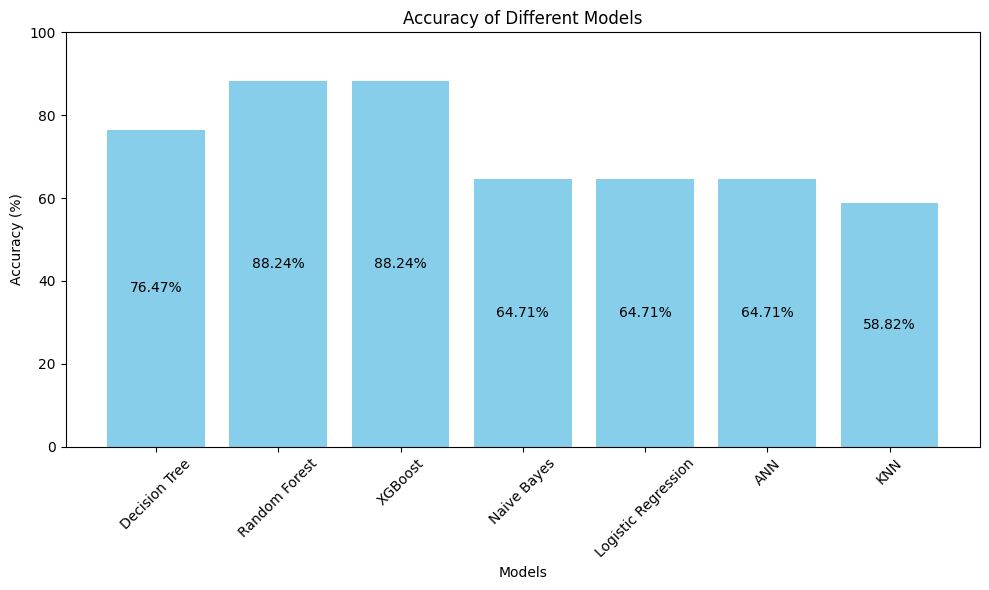

In [ ]:
import matplotlib.pyplot as plt

# List of accuracy values
accuracies = [dt_accuracy, rf_accuracy, xg_accuracy, nb_accuracy, lr_accuracy, ann_accuracy, knn_accuracy]

# List of model names
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'Naive Bayes', 'Logistic Regression', 'ANN', 'KNN']

# Convert accuracies to percentages
accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies_percentage, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels in the middle of the bars
for bar, accuracy in zip(bars, accuracies_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{accuracy:.2f}%', ha='center', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

The Random Forest and XGBoost were the strongest models and provided the highest accuracy. We first tried decision tree and noticed it had a higher accuracy than other models. We then tried out more advanced tree based models like random forest and XGBoost. As expected those models gave higher accuracies than the decision tree model.

Random Forest is an ensemble method that builds multiple Decision Trees and combines their predictions to make more accurate and robust predictions.

XGBoost is also an ensemble method, combining the predictions of multiple base estimators (decision trees, in this case). It uses complex regularization techniques known as regularization trees to prevent overfitting and improve generalization.



## Conclusion

In [ ]:
# Making a plot to visualise the fact that the two temperatures can be differentitated from one another. Do this by taking the average of the cold and room temperature rows for the FFT datasets:

# Calculate the average for the specified rows
avg_test_room = X_test.iloc[0:9].mean(axis=1)
avg_test_cold = X_test.iloc[10:17].mean(axis=1)
avg_train_room = X_train.iloc[0:29].mean(axis=1)
avg_train_cold = X_train.iloc[30:57].mean(axis=1)

# Concatenate the room and cold averages
avg_room = pd.concat([avg_test_room, avg_train_room])
avg_cold = pd.concat([avg_test_cold, avg_train_cold])

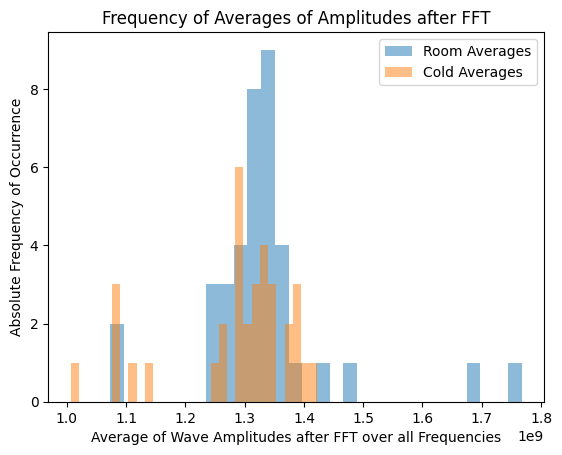

In [ ]:
# Make a scatter plot of the two series of averages
import matplotlib.pyplot as plt

# Plot histograms; alpha is about transparency of the bins (alpha=0 means completely transparent)
plt.hist(avg_room, alpha=0.5, bins=30, label='Room Averages')
plt.hist(avg_cold, alpha=0.5, bins=30, label='Cold Averages')
plt.title('Frequency of Averages of Amplitudes after FFT')
plt.xlabel('Average of Wave Amplitudes after FFT over all Frequencies')
plt.ylabel('Absolute Frequency of Occurrence')
plt.legend()
plt.show()

This histogram shows each average obtained above is the average of the amplitudes of the waves that make up brainwaves at all measured frequencies (average of the numbers in the FFT dataset by row).

In room temperature, the absolute frequency of the average amplitude of the waves is high when the average amplitude is about 1.3e9, meaning that in room temperature, the overall magnitude of the brain's activity (brainwaves) is greater as compared with a cold ambient temperature.

In conclusion, we were successful in using machine learning to model brainwave changes during cognitive tasks at different ambient temperatures. There is a clear difference between the brainwave pattern of cold vs room temperature tests.